<a href="https://colab.research.google.com/github/zakynine/ml-img-clsfr/blob/main/image_clsfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Deklarasi library yang diperlukan

from google.colab import drive
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os,shutil
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#mount drive untuk load dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Melakukan ekstraksi dataset zip
food_11_path = '/content/drive/MyDrive/Colab Notebooks/datasets/food-11/food_11_dataset.zip'
zip_dataset = zipfile.ZipFile(food_11_path, 'r')
zip_dataset.extractall('/tmp')
zip_dataset.close()


In [ ]:
# make dir for splitting dataset
home_dir = '/tmp/food_11_dataset'
train_dir = os.path.join(home_dir, 'train')
valid_dir = os.path.join(home_dir, 'valid')

bread_dir = os.path.join(home_dir,'Bread')
dairy_dir = os.path.join(home_dir,'Dairy product')
dessert_dir = os.path.join(home_dir,'Dessert')
egg_dir = os.path.join(home_dir, 'Egg')
fried_dir = os.path.join(home_dir, 'Fried food')
meat_dir = os.path.join(home_dir, 'Meat')
noodles_dir = os.path.join(home_dir, 'Noodles-Pasta')
rice_dir = os.path.join(home_dir, 'Rice')
seafood_dir = os.path.join(home_dir, 'Seafood')
soup_dir = os.path.join(home_dir, 'Soup')
vegeta_dir = os.path.join(home_dir, 'Vegetable-Fruit')

if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(valid_dir):
  os.mkdir(valid_dir)

train_bread = os.path.join(train_dir,'Bread')
train_dairy = os.path.join(train_dir,'Dairy product')
train_dessert = os.path.join(train_dir,'Dessert')
train_egg = os.path.join(train_dir, 'Egg')
train_fried = os.path.join(train_dir, 'Fried food')
train_meat = os.path.join(train_dir, 'Meat')
train_noodles = os.path.join(train_dir, 'Noodles-Pasta')
train_rice = os.path.join(train_dir, 'Rice')
train_seafood = os.path.join(train_dir, 'Seafood')
train_soup = os.path.join(train_dir, 'Soup')
train_vegeta = os.path.join(train_dir, 'Vegetable-Fruit')

valid_bread = os.path.join(valid_dir,'Bread')
valid_dairy = os.path.join(valid_dir,'Dairy product')
valid_dessert = os.path.join(valid_dir,'Dessert')
valid_egg = os.path.join(valid_dir, 'Egg')
valid_fried = os.path.join(valid_dir, 'Fried food')
valid_meat = os.path.join(valid_dir, 'Meat')
valid_noodles = os.path.join(valid_dir, 'Noodles-Pasta')
valid_rice = os.path.join(valid_dir, 'Rice')
valid_seafood = os.path.join(valid_dir, 'Seafood')
valid_soup = os.path.join(valid_dir, 'Soup')
valid_vegeta = os.path.join(valid_dir, 'Vegetable-Fruit')

# membuat dan mengecek direktori train dan val tiap fitur
if not os.path.exists(train_bread):
  os.mkdir(train_bread)
if not os.path.exists(train_dairy):
  os.mkdir(train_dairy)
if not os.path.exists(train_dessert):
  os.mkdir(train_dessert)
if not os.path.exists(train_egg):
  os.mkdir(train_egg)
if not os.path.exists(train_fried):
  os.mkdir(train_fried)
if not os.path.exists(train_meat):
  os.mkdir(train_meat)
if not os.path.exists(train_noodles):
  os.mkdir(train_noodles)
if not os.path.exists(train_rice):
  os.mkdir(train_rice)
if not os.path.exists(train_seafood):
  os.mkdir(train_seafood)
if not os.path.exists(train_soup):
  os.mkdir(train_soup)
if not os.path.exists(train_vegeta):
  os.mkdir(train_vegeta)

if not os.path.exists(valid_bread):
  os.mkdir(valid_bread)
if not os.path.exists(valid_dairy):
  os.mkdir(valid_dairy)
if not os.path.exists(valid_dessert):
  os.mkdir(valid_dessert)
if not os.path.exists(valid_egg):
  os.mkdir(valid_egg)
if not os.path.exists(valid_fried):
  os.mkdir(valid_fried)
if not os.path.exists(valid_meat):
  os.mkdir(valid_meat)
if not os.path.exists(valid_noodles):
  os.mkdir(valid_noodles)
if not os.path.exists(valid_rice):
  os.mkdir(valid_rice)
if not os.path.exists(valid_seafood):
  os.mkdir(valid_seafood)
if not os.path.exists(valid_soup):
  os.mkdir(valid_soup)
if not os.path.exists(valid_vegeta):
  os.mkdir(valid_vegeta)

In [ ]:
# splitting dataset to 20% test 
train_bread_dir, valid_bread_dir = train_test_split(os.listdir(bread_dir), test_size=0.2)
train_dairy_dir, valid_dairy_dir = train_test_split(os.listdir(dairy_dir), test_size=0.2)
train_dessert_dir, valid_dessert_dir = train_test_split(os.listdir(dessert_dir), test_size=0.2)
train_egg_dir, valid_egg_dir = train_test_split(os.listdir(egg_dir), test_size=0.2)
train_fried_dir, valid_fried_dir = train_test_split(os.listdir(fried_dir), test_size=0.2)
train_meat_dir, valid_meat_dir = train_test_split(os.listdir(meat_dir), test_size=0.2)
train_noodles_dir, valid_noodles_dir = train_test_split(os.listdir(noodles_dir), test_size=0.2)
train_rice_dir, valid_rice_dir = train_test_split(os.listdir(rice_dir), test_size=0.2)
train_seafood_dir, valid_seafood_dir = train_test_split(os.listdir(seafood_dir), test_size=0.2)
train_soup_dir, valid_soup_dir = train_test_split(os.listdir(soup_dir), test_size=0.2)
train_vegeta_dir, valid_vegeta_dir = train_test_split(os.listdir(vegeta_dir), test_size=0.2)

In [ ]:
# copy file to splitted dir
for file in train_bread_dir:
  shutil.copy(os.path.join(bread_dir, file), os.path.join(train_bread, file))
for file in train_dairy_dir:
  shutil.copy(os.path.join(dairy_dir, file), os.path.join(train_dairy, file))
for file in train_dessert_dir:
  shutil.copy(os.path.join(dessert_dir, file), os.path.join(train_dessert, file))
for file in train_egg_dir:
  shutil.copy(os.path.join(egg_dir, file), os.path.join(train_egg, file))
for file in train_fried_dir:
  shutil.copy(os.path.join(fried_dir, file), os.path.join(train_fried, file))
for file in train_meat_dir:
  shutil.copy(os.path.join(meat_dir, file), os.path.join(train_meat, file))
for file in train_noodles_dir:
  shutil.copy(os.path.join(noodles_dir, file), os.path.join(train_noodles, file))
for file in train_rice_dir:
  shutil.copy(os.path.join(rice_dir, file), os.path.join(train_rice, file))
for file in train_seafood_dir:
  shutil.copy(os.path.join(seafood_dir, file), os.path.join(train_seafood, file))
for file in train_soup_dir:
  shutil.copy(os.path.join(soup_dir, file), os.path.join(train_soup, file))
for file in train_vegeta_dir:
  shutil.copy(os.path.join(vegeta_dir, file), os.path.join(train_vegeta, file))


for file in valid_bread_dir:
  shutil.copy(os.path.join(bread_dir, file), os.path.join(valid_bread, file))
for file in valid_dairy_dir:
  shutil.copy(os.path.join(dairy_dir, file), os.path.join(valid_dairy, file))
for file in valid_dessert_dir:
  shutil.copy(os.path.join(dessert_dir, file), os.path.join(valid_dessert, file))
for file in valid_egg_dir:
  shutil.copy(os.path.join(egg_dir, file), os.path.join(valid_egg, file))
for file in valid_fried_dir:
  shutil.copy(os.path.join(fried_dir, file), os.path.join(valid_fried, file))
for file in valid_meat_dir:
  shutil.copy(os.path.join(meat_dir, file), os.path.join(valid_meat, file))
for file in valid_noodles_dir:
  shutil.copy(os.path.join(noodles_dir, file), os.path.join(valid_noodles, file))
for file in valid_rice_dir:
  shutil.copy(os.path.join(rice_dir, file), os.path.join(valid_rice, file))
for file in valid_seafood_dir:
  shutil.copy(os.path.join(seafood_dir, file), os.path.join(valid_seafood, file))
for file in valid_soup_dir:
  shutil.copy(os.path.join(soup_dir, file), os.path.join(valid_soup, file))
for file in valid_vegeta_dir:
  shutil.copy(os.path.join(vegeta_dir, file), os.path.join(valid_vegeta, file))

In [ ]:
# using imagedatagenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    vertical_flip=False,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='wrap')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=False,
                    shear_range=0.2,
                    fill_mode='wrap')

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='categorical')

valid_generator = test_datagen.flow_from_directory(
                    valid_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='categorical')

Found 9606 images belonging to 11 classes.
Found 3606 images belonging to 11 classes.


In [ ]:
# menggunakan sequential

ml_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [ ]:
 # menggunakan callbacks untuk atasi overfitting

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
       print("\n Akurasi > 92%, stop training!!!")
       self.model.stop_training=True

callbacks = myCallback()

In [ ]:
# compile

ml_model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),#learning_rate=1.000e-02),
              metrics=['accuracy'])

history = ml_model.fit(
    train_generator,
    steps_per_epoch=250,
    epochs=150,
    validation_data=valid_generator,
    validation_steps=62,
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/150
250/250 - 91s - loss: 2.1734 - accuracy: 0.2200 - val_loss: 1.9498 - val_accuracy: 0.3054
Epoch 2/150
250/250 - 82s - loss: 1.8851 - accuracy: 0.3459 - val_loss: 1.7812 - val_accuracy: 0.3916
Epoch 3/150
250/250 - 82s - loss: 1.7060 - accuracy: 0.4130 - val_loss: 1.6082 - val_accuracy: 0.4430
Epoch 4/150
250/250 - 82s - loss: 1.5857 - accuracy: 0.4509 - val_loss: 1.5274 - val_accuracy: 0.4773
Epoch 5/150
250/250 - 82s - loss: 1.4974 - accuracy: 0.4797 - val_loss: 1.3797 - val_accuracy: 0.5257
Epoch 6/150
250/250 - 81s - loss: 1.4013 - accuracy: 0.5127 - val_loss: 1.4561 - val_accuracy: 0.5005
Epoch 7/150
250/250 - 81s - loss: 1.3367 - accuracy: 0.5330 - val_loss: 1.2572 - val_accuracy: 0.5570
Epoch 8/150
250/250 - 82s - loss: 1.2625 - accuracy: 0.5576 - val_loss: 1.3278 - val_accuracy: 0.5388
Epoch 9/150
250/250 - 82s - loss: 1.1912 - accuracy: 0.5860 - val_loss: 1.1621 - val_accuracy: 0.5927
Epoch 10/150
250/250 - 83s - loss: 1.1481 - accuracy: 0.6007 - val_loss: 1.0782 - 

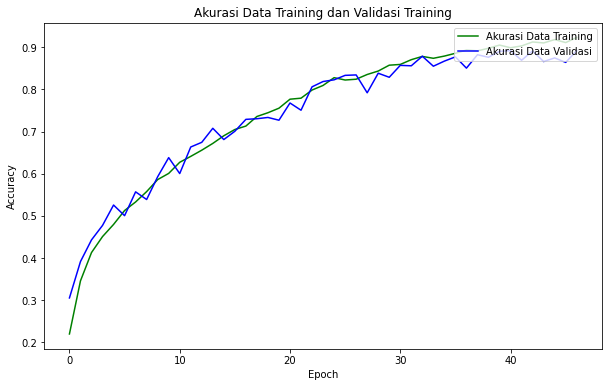

In [ ]:
# Plotting Accuaray metrics 
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], 'g', label='Akurasi Data Training')
plt.plot(history.history['val_accuracy'], 'b', label='Akurasi Data Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Akurasi Data Training dan Validasi Training')
plt.legend(loc='upper right')
plt.show()

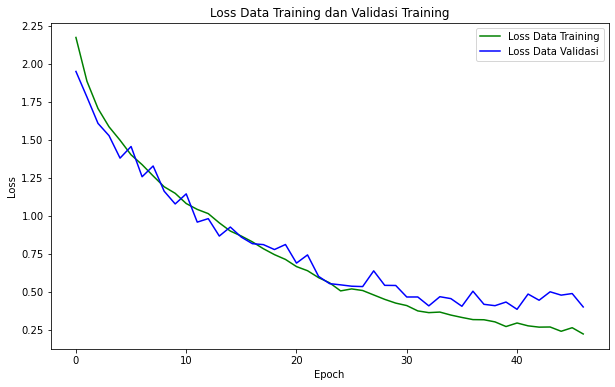

In [ ]:
# Plotting Loss metrics
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], 'g', label='Loss Data Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Data Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Data Training dan Validasi Training')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Comvert to TF-Lite

converter = tf.lite.TFLiteConverter.from_keras_model(ml_model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp74181w71/assets
